In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
abspath = 'C:\\Users\\Rameez PC\\Documents\\GitHub\\Econometrics\\hypothesis testing b\\'
data = pd.read_excel(abspath + 'capm.xls', index_col=0)
data.head()

,SANDP,FORD,GE,MICROSOFT,ORACLE,USTB3M
Date,,,,,,
2002-01-01,1130.20,12.57,25.70,27.33,16.64,1.73
2002-02-01,1106.73,12.23,26.75,25.02,16.03,1.75
2002-03-01,1147.39,13.55,25.99,25.87,12.34,1.77
2002-04-01,1076.92,13.15,21.92,22.41,9.68,1.78
2002-05-01,1067.14,14.59,21.64,21.84,7.64,1.77


In [3]:
def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff



In [5]:
data = pd.DataFrame({'ret_sandp' : LogDiff(data['SANDP']),
'ret_ford' : LogDiff(data['FORD']),
'USTB3M' : data['USTB3M']/12,
'ersandp' : LogDiff(data['SANDP']) - data['USTB3M']/12,
'erford' : LogDiff(data['FORD']) - data['USTB3M']/12})

In [6]:
data.head()

,ret_sandp,ret_ford,USTB3M,ersandp,erford
Date,,,,,
2002-01-01,NaN,NaN,0.144167,NaN,NaN
2002-02-01,-2.098489,-2.742107,0.145833,-2.244322,-2.887941
2002-03-01,3.608008,10.249460,0.147500,3.460508,10.101960
2002-04-01,-6.338468,-2.996479,0.148333,-6.486802,-3.144812
2002-05-01,-0.912294,10.391460,0.147500,-1.059794,10.243960


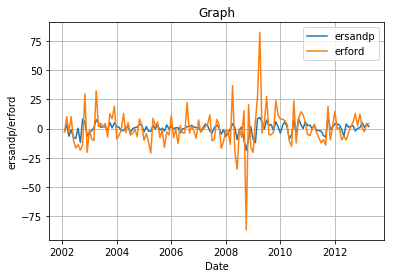

In [11]:
plt.figure(0)
plt.plot(data['ersandp'], label='ersandp')
plt.plot(data['erford'], label='erford')
plt.xlabel('Date')
plt.ylabel('ersandp/erford')
plt.title('Graph')
plt.grid(True)
plt.legend()
plt.show()

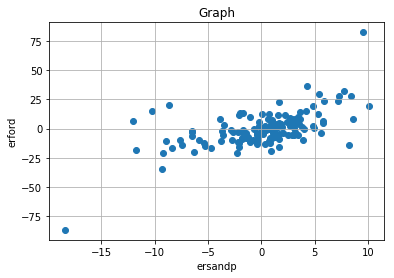

In [12]:
plt.figure(1)
plt.scatter(data['ersandp'], data['erford'])
plt.xlabel('ersandp')
plt.ylabel('erford')
plt.title('Graph')
plt.grid(True)
plt.show()

In [ ]:
# To estimate the CAPM equation, we employ the statsmodels.formula.api. As usual, we first run
# the regression formula which is ’erford  ersandp’. Thus, the dependent variable (y) is the excess
# return of Ford ’erford’ and it is regressed on a constant as well as the excess market return ’ersandp’.13
# Next, we use the smf.ols() function followed by fit(). Note that we keep the default setting this in
# case although the function fit() can allow for different treatments of the standard errors. Finally, the
# result is outputted by summary(). The OLS regression results appear in the following code cell (see
# In [5]).
# For the case of the Ford stock, the CAPM regression equation takes the form
# (RFord - r f ) = a + b(RM - r f ) + ut

In [13]:
formula = 'erford ~ ersandp'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     72.64
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.98e-14
Time:                        13:28:00   Log-Likelihood:                -532.80
No. Observations:                 135   AIC:                             1070.
Df Residuals:                     133   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3199      1.086     -0.294      0.7

In [ ]:
# What is the slope coefficient estimate?
# and what does it signify? Is this coefficient statistically significant? The beta coefficient (the
# slope) estimate is 2.0262 with a t-ratio of 8.523 and a corresponding p-value of 0.000. This suggests
#that the excess return on the market proxy has highly significant explanatory power for the variability
#of the excess return of Ford stock. 

In [ ]:
#Let us turn to the intercept now. What is the interpretation of
#the intercept estimate? Is it statistically significant? The a estimate is –0.3199 with a t-ratio of –0.294
# and a p-value of 0.769. Not statistically significant. Thus, we 'fail to reject'/retain the null hypothesis 
# that the a estimate is different from
# 0, indicating that Ford stock does not seem to significantly out-perform or under-perform the overall
#market. Its around 0 so does not over or under perform than the market.

#Mathematically speaking, alpha is the rate of return that exceeds what was expected or 
#predicted by models like the capital asset pricing model (CAPM).

# The fundamental quandary for investors of how get the highest return possible for the least 
# amount of risk can be measured by alpha. 
# It is a measurable way to determine whether a manager's skill has added value to a fund on a risk-adjusted basis.

In [ ]:
#Assume that we want to test the null hypothesis of whether the value of the population coefficient on
#'ersandp' is equal to 1. How can we achieve this? The answer is to use the statsmodels.formula.api
#library to launch a f_test and then to specify hypotheses = 'ersandp = 1'. By printing the result of the
#f_test, the statistic for this hypothesis test appears in the output window. The F-statistic of 18.63 with
#a corresponding p-value of 0 (at least up to the fourth decimal place. see e raised to the power implies its 0) 
#implies that the null hypothesis
#of the CAPM beta of Ford stock being 1 is rejected and hence the estimated beta of 2.026
#is significantly different from 1.

In [15]:
formula = 'erford ~ ersandp'
hypotheses = 'ersandp = 1'
results = smf.ols(formula, data).fit()
# We can, of course, calculate the test statistics for this hypothesis test by hand; however, it is
# easier if we let Python do this work. For this we use the Statsmodels function 'f_test'.
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[18.63204281]]), p=3.0722181679505155e-05, df_denom=133, df_num=1>


In [ ]:
#  However, it is sometimes the case, especially if
# the sample size is quite small and this leads to large standard errors, that many different hypotheses will all result in
#non-rejection – for example, both H0 : b = 0 and H0 : b = 1 not rejected.